In [1]:
import torch

In [2]:
import torch.nn as nn
from torch.autograd import Variable

In [3]:
import numpy as np
import random
import pandas as pd 
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

from pandas import datetime
import math, time
import itertools
import datetime
from operator import itemgetter
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from math import sqrt

/var/folders/4r/l886k45s0_l30d_d6cnz284c0000gn/T/ipykernel_33114/3393739507.py:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [6]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df_raw = pd.read_csv('./all_stocks_10_2015_2020.csv')
df_raw.head()

,Date,GOOGL,TSLA,FB,AMZN,AAPL,MSFT,VOD,ADBE,NVDA,CRM
0,2015-01-02,26.477501,14.620667,NaN,15.4260,24.644016,40.926445,21.941380,72.339996,4.836187,59.240002
1,2015-01-05,25.973000,14.006000,NaN,15.1095,23.949757,40.550079,21.167665,71.980003,4.754503,58.169998
2,2015-01-06,25.332001,14.085333,NaN,14.7645,23.952015,39.954926,21.032263,70.529999,4.610353,57.200001
3,2015-01-07,25.257500,14.063333,NaN,14.9210,24.287872,40.462563,21.174110,71.110001,4.598341,56.930000
4,2015-01-08,25.345501,14.041333,NaN,15.0230,25.221066,41.652901,21.915594,72.919998,4.771319,58.590000


In [8]:
stock_data = df_raw[['Date', 'MSFT']].dropna()
stock_data.tail(100)

,Date,MSFT
1390,2020-07-13,202.992340
1391,2020-07-14,204.247131
1392,2020-07-15,203.943207
1393,2020-07-16,199.904343
1394,2020-07-17,198.884827
...,...,...
1485,2020-11-24,210.705612
1486,2020-11-25,210.715424
1487,2020-11-27,212.055389
1488,2020-11-30,210.912521


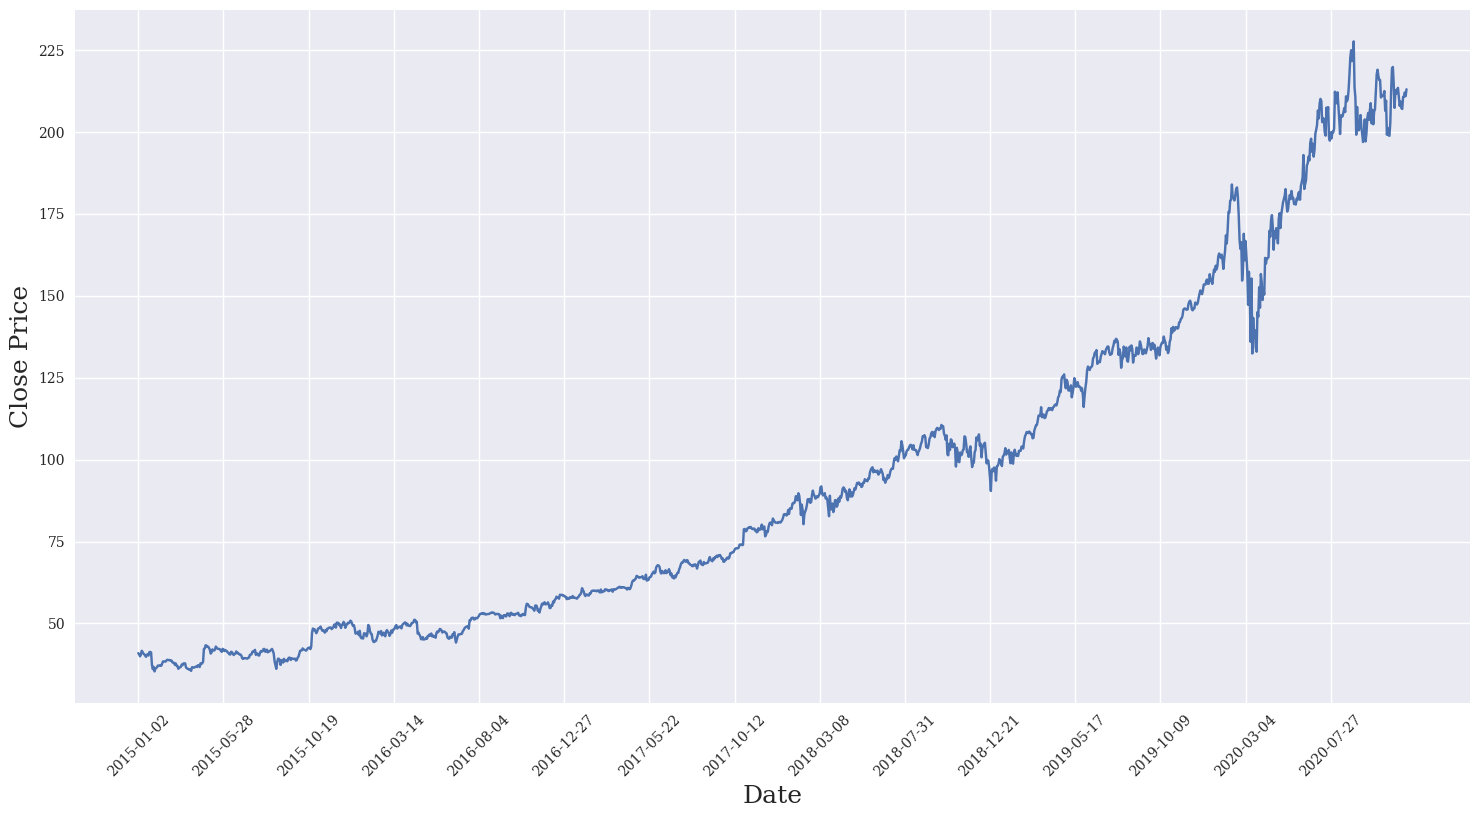

In [9]:
plt.figure(figsize = (18,9))
plt.plot(range(stock_data.shape[0]),stock_data['MSFT'])
plt.xticks(range(0,stock_data.shape[0],100),stock_data['Date'].loc[::100],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.show()

In [10]:
## Data Preprocessing
##
stock_data.shape

(1490, 2)

In [11]:
all_data = stock_data['MSFT'].values.astype(float)
all_data.size

1490

In [12]:
all_data

array([ 40.92644501,  40.55007935,  39.95492554, ..., 212.0553894 ,
       210.91252136, 213.02093506])

In [13]:
test_data_size = 22

In [14]:
train_data = all_data[:-test_data_size]
test_data = all_data[-test_data_size:]

In [15]:
# The following code normalizes our data using the min/max scaler with minimum andmaximum values of -1 and 1, respectively.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1))
train_data_normalized = scaler.fit_transform(train_data .reshape(-1,1))

In [16]:
print(train_data_normalized[:5])
print(train_data_normalized[-5:])

[[-0.94209869]
 [-0.94601351]
 [-0.95220409]
 [-0.94692383]
 [-0.93454236]]
[[0.84238504]
 [0.77952317]
 [0.81192513]
 [0.70388399]
 [0.72473584]]


In [17]:
# The next step is to convert our dataset into tensors since PyTorch models are trained usingtensors.
train_data_normalized = torch.FloatTensor(train_data_normalized).view(-1)

In [18]:
# You can use any sequence length and it depends upon the domain knowledge.
train_window = 22

In [25]:
# Next, we will define a function named create_inout_sequences. The function will accept the raw input data 
# and will return a list of tuples.
def create_inout_sequences(input_data, tw):
    inout_seq = []
    L = len(input_data)
    for i in range(L-tw):
        train_seq = input_data[i:i+tw]
        train_label = input_data[i+tw:i+tw+1]
        inout_seq.append((train_seq ,train_label))
    return inout_seq

In [26]:
# Execute the following script to create sequences and corresponding labels for training: 
train_inout_seq = create_inout_sequences(train_data_normalized, train_window)

In [27]:
# Let's now print the first 5 items of the train_inout_seq list:
train_inout_seq[:5]

[(tensor([-0.9421, -0.9460, -0.9522, -0.9469, -0.9345, -0.9382, -0.9436, -0.9457,
          -0.9494, -0.9538, -0.9468, -0.9455, -0.9497, -0.9387, -0.9383, -0.9398,
          -0.9794, -0.9928, -0.9853, -1.0000, -0.9920, -0.9891]),
  tensor([-0.9869])),
 (tensor([-0.9460, -0.9522, -0.9469, -0.9345, -0.9382, -0.9436, -0.9457, -0.9494,
          -0.9538, -0.9468, -0.9455, -0.9497, -0.9387, -0.9383, -0.9398, -0.9794,
          -0.9928, -0.9853, -1.0000, -0.9920, -0.9891, -0.9869]),
  tensor([-0.9813])),
 (tensor([-0.9522, -0.9469, -0.9345, -0.9382, -0.9436, -0.9457, -0.9494, -0.9538,
          -0.9468, -0.9455, -0.9497, -0.9387, -0.9383, -0.9398, -0.9794, -0.9928,
          -0.9853, -1.0000, -0.9920, -0.9891, -0.9869, -0.9813]),
  tensor([-0.9817])),
 (tensor([-0.9469, -0.9345, -0.9382, -0.9436, -0.9457, -0.9494, -0.9538, -0.9468,
          -0.9455, -0.9497, -0.9387, -0.9383, -0.9398, -0.9794, -0.9928, -0.9853,
          -1.0000, -0.9920, -0.9891, -0.9869, -0.9813, -0.9817]),
  tensor([-0.9

In [28]:
## Creating LSTM Model

In [29]:
# We have preprocessed the data, now is the time to train our model. We will define a class LSTM, 
# which inherits from nn.Module class of the PyTorch library.
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=100, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size
        self.lstm = nn.LSTM(input_size, hidden_layer_size)
        self.linear = nn.Linear(hidden_layer_size, output_size)
        self.hidden_cell = (torch.zeros(1,1,self.hidden_layer_size),
                            torch.zeros(1,1,self.hidden_layer_size))
    
    def forward(self, input_seq):
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq) ,1, -1), self.hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions[-1]

In [31]:
# The next step is to create an object of the LSTM() class, define a loss function and the optimizer. 
# Since, we are solving a classification problem, we will use the MSE loss. 
# For the optimizer function, we will use the adam optimizer.
model = LSTM()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [32]:
print(model)

LSTM(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)


In [33]:
## Training the Model
# We will train our model for 150 epochs. You can try with more epochs if you want. 
# The loss will be printed after every 25 epochs.

epochs = 150

for i in range(epochs):
    for seq, labels in train_inout_seq:
        optimizer.zero_grad()
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))

        y_pred = model(seq)

        single_loss = loss_function(y_pred, labels)
        single_loss.backward()
        optimizer.step()

    if i%25 == 1:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

epoch:   1 loss: 0.00332310
epoch:  26 loss: 0.00311463
epoch:  51 loss: 0.00045814
epoch:  76 loss: 0.00042751
epoch: 101 loss: 0.00006014
epoch: 126 loss: 0.00062046
epoch: 149 loss: 0.0003315236


In [34]:
## Making Predictions

In [35]:
# Now that our model is trained, we can start to make predictions. Since our test set contains the price 
# data for the last 5 years and our model is trained to make predictions using a sequence length of 22. 
# We will first filter the last 22 values from the training set:
fut_pred = 22

test_inputs = train_data_normalized[-train_window:].tolist()
print(test_inputs)

[0.7820785045623779, 0.8038502931594849, 0.7397618293762207, 0.7825897336006165, 0.7368995547294617, 0.7769677042961121, 0.784633994102478, 0.8380922675132751, 0.8952299952507019, 0.910153329372406, 0.8897104859352112, 0.877444863319397, 0.877444863319397, 0.8218399882316589, 0.8262351751327515, 0.8277686834335327, 0.8286881446838379, 0.8423850536346436, 0.7795231938362122, 0.8119251132011414, 0.7038840055465698, 0.7247358560562134]


In [36]:
# You can compare the above values with the last 22 values of the train_data_normalized data list.
# The following script is used to make predictions:
model.eval()

for i in range(fut_pred):
    seq = torch.FloatTensor(test_inputs[-train_window:])
    with torch.no_grad():
        model.hidden = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))
        test_inputs.append(model(seq).item())

In [37]:
# If you print the length of the test_inputs list, you will see it contains 44 items. 
# The last 22 predicted items can be printed as follows:
test_inputs[fut_pred:]

[0.7400633096694946,
 0.7712967395782471,
 0.798922061920166,
 0.8258588910102844,
 0.8523223996162415,
 0.8730846643447876,
 0.8842591047286987,
 0.8838430047035217,
 0.8726798892021179,
 0.8563300967216492,
 0.8423430919647217,
 0.8348715305328369,
 0.8326594233512878,
 0.8317886590957642,
 0.8300366401672363,
 0.826270341873169,
 0.8214244246482849,
 0.8171784281730652,
 0.8152095079421997,
 0.8163305521011353,
 0.8200617432594299,
 0.8254651427268982]

In [38]:
# Since we normalized the dataset for training, the predicted values are also normalized. 
# We need to convert the normalized predicted values into actual predicted values. 
# We can do so by passing the normalized values to the inverse_transform method of the min/max scaler 
# object that we used to normalize our dataset.
actual_predictions = scaler.inverse_transform(np.array(test_inputs[train_window:] ).reshape(-1, 1))
print(actual_predictions)

[[202.64726887]
 [205.6500094 ]
 [208.30587125]
 [210.89554228]
 [213.4397089 ]
 [215.4357655 ]
 [216.51006138]
 [216.47005807]
 [215.39685095]
 [213.82500359]
 [212.4803115 ]
 [211.76200549]
 [211.54933644]
 [211.46562232]
 [211.29718554]
 [210.93509862]
 [210.46921856]
 [210.06101409]
 [209.87172471]
 [209.97950041]
 [210.33821218]
 [210.85768784]]


In [39]:
# Let's now plot the predicted values against the actual values. Look at the following code:
x = np.arange(stock_data.shape[0]-22, stock_data.shape[0], 1)
print(x)

[1468 1469 1470 1471 1472 1473 1474 1475 1476 1477 1478 1479 1480 1481
 1482 1483 1484 1485 1486 1487 1488 1489]


In [40]:
stock_data['MSFT'][-train_window:]

1468    198.962692
1469    198.825119
1470    202.854095
1471    212.641586
1472    219.422058
1473    219.844620
1474    214.606918
1475    207.354767
1476    212.798798
1477    211.708038
1478    212.759506
1479    213.467010
1480    210.745026
1481    207.966614
1482    209.286819
1483    207.286789
1484    207.010895
1485    210.705612
1486    210.715424
1487    212.055389
1488    210.912521
1489    213.020935
Name: MSFT, dtype: float64

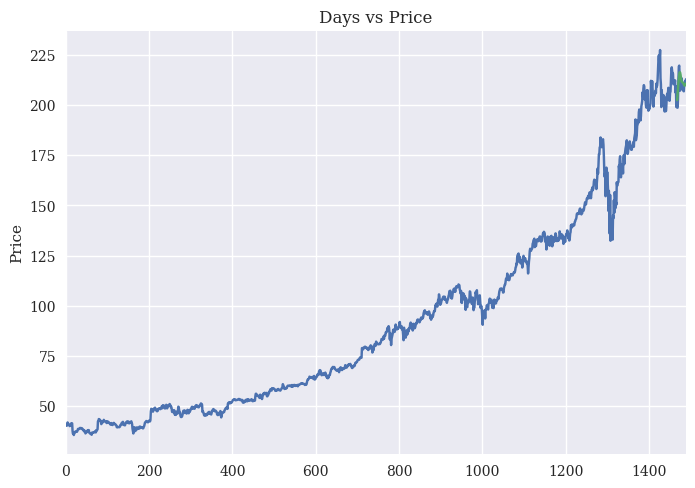

In [41]:
# In the following script, we will plot the price for 225 days, along with 
# the predicted number of passengers for the last 22 days.
plt.title('Days vs Price')
plt.ylabel('Price')
plt.grid(True)
plt.autoscale(axis='x', tight=True)
plt.plot(range(stock_data.shape[0]), stock_data['MSFT'])
plt.plot(x,actual_predictions)
plt.show()

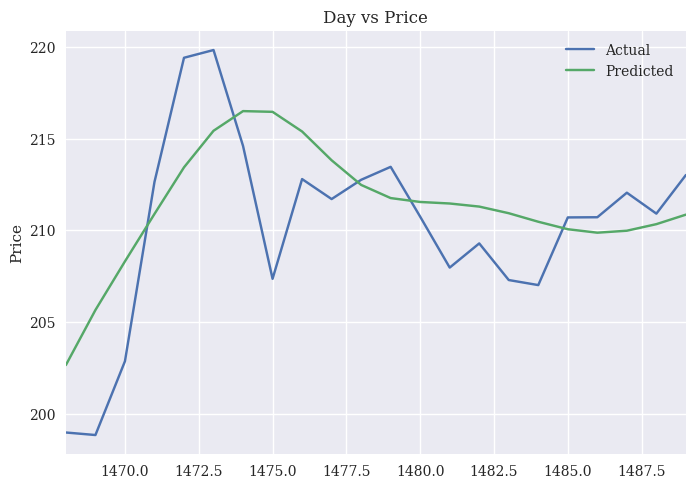

In [44]:
plt.title('Day vs Price')
plt.ylabel('Price')
plt.grid(True)
plt.autoscale(axis='x', tight=True)
#plt.xticks(x,stock_data['Date'].loc[::1],rotation=45)
plt.plot(stock_data['MSFT'][-train_window:])
plt.plot(x,actual_predictions)
plt.legend(["Actual", "Predicted"], loc ="upper right")
plt.show()